In [1]:
import pystan
import numpy as np

In [2]:
model = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters { 
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model { 
  y ~ normal(alpha + beta * x, sigma);
}
"""

In [3]:
datum = np.loadtxt("women.tsv", delimiter="\t", usecols=(1, 2), skiprows=1)

In [4]:
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]

In [5]:
fit = pystan.stan(model_code=model, data=dict(y=heights, x=weights, N=len(heights)))

In [6]:
print(fit)

Inference for Stan model: anon_model_d5c9515652e6c049f3e6b6cc53cb45ed.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha -87.74    0.28   6.47 -100.8 -91.74 -87.76 -83.47 -75.31  547.0    1.0
beta    3.45  4.3e-3    0.1   3.26   3.39   3.45   3.51   3.65  544.0    1.0
sigma   1.68    0.01   0.36   1.14   1.43   1.62   1.88    2.5  609.0    1.0
lp__  -13.97    0.05   1.25 -17.18 -14.56 -13.66 -13.02 -12.49  636.0    1.0

Samples were drawn using NUTS(diag_e) at Mon Jun 27 14:00:44 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [7]:
fit.plot()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
samples = fit.extract(permuted=True)
alpha = np.median(samples["alpha"])
beta = np.median(samples["beta"])

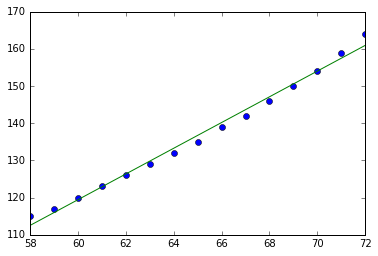

In [12]:
plt.plot(weights, heights, "o")
plt.plot(weights, alpha + beta * weights)
plt.show()

In [13]:
datum

array([[  58.,  115.],
       [  59.,  117.],
       [  60.,  120.],
       [  61.,  123.],
       [  62.,  126.],
       [  63.,  129.],
       [  64.,  132.],
       [  65.,  135.],
       [  66.,  139.],
       [  67.,  142.],
       [  68.,  146.],
       [  69.,  150.],
       [  70.,  154.],
       [  71.,  159.],
       [  72.,  164.]])

In [14]:
samples

OrderedDict([(u'alpha',
              array([ -85.17751526,  -89.09972412,  -96.56231134, ...,  -77.48670801,
                      -97.5094758 , -100.19309052])),
             (u'beta',
              array([ 3.41249023,  3.47840149,  3.58665085, ...,  3.29621573,
                      3.60254252,  3.63828803])),
             (u'sigma',
              array([ 1.94685732,  1.51147492,  1.17916977, ...,  1.31154517,
                      2.03663507,  1.86467662])),
             (u'lp__',
              array([-13.38668679, -12.67667206, -15.20328873, ..., -14.51470653,
                     -14.3988749 , -14.91153716]))])